In [106]:
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dropout,MaxPool2D,Input,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [108]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [111]:
X = data.drop("output",axis=1)
y = data["output"]

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [144]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ENGTNGT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [146]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [148]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10)
history = model.fit(X_train_scaled,y_train,epochs=100,batch_size=32)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4132 - loss: 0.7496
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5549 - loss: 0.7261
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5424 - loss: 0.6930  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5757 - loss: 0.6502  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6410 - loss: 0.6595  
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6736 - loss: 0.6368  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5993 - loss: 0.6540  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5882 - loss: 0.6081
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.5674  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.5679  
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7486 - loss: 0.5721
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7396 - 

In [149]:
model.evaluate(X_test,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7054 - loss: 11.6966  


[12.891875267028809, 0.6625514626502991]

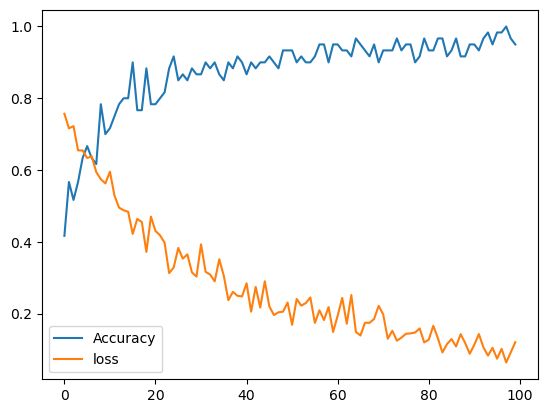

In [150]:
plt.plot(history.history["accuracy"],label="Accuracy")
#plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.plot(history.history["loss"],label="loss")
#plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()